# Linear classification with the Iris data set

First we import the modules we shall use:
* Pandas: for data import
* Numpy: for handling operations with arrray
* Matplotlib: for plotting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Next we configure the plotting option:

In [2]:
%matplotlib inline

#matplotlib.rc("savefig", dpi=150)

* The magic `%matplot inline` tells IPython to show the plots within the notebook;
* The `matplotlib.rc` function changes the resolution of the plots.

We will be using pseudo random numbers, and therefore, need to initialize a seed for the generator:

In [3]:
np.random.seed(7) # chosen to include a "bad point"

# Load and prepare the Iris flower data set for our linear classification trials

The first functions we implement fetches the iris data from an internet archive using a call to the Pandas module and saves it in the current directory under the name `iris.csv`. This function needs to called only once, of course.

In [4]:
def fetch_iris_data():
    '''
    Fetch data from an internet archive and save as file `iris.csv`.
    '''

    df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                     header=None)
    df.to_csv('iris.csv', header=None, index=False)

    return

The next function loads the Iris data from the file `iris.csv` from the current directory and prepares the data for the perceptron training.

In [173]:
def load_iris_data():
    ''' 
    Fetches 2d data points from the iris data from the internet archive and
    return (X, Y), where X is a list of 2d points and Y a list of labels.
    '''
   
    # fetch data from internet archive
    df = pd.read_csv('iris.csv', header=None)
    
    # as feature we take the first two data entries,
    # which are sepal length and width
    X = df.iloc[:, 0:2].values

    # read class labels and convert them to numers as follow:
    # `iris-setosa` set to value -1, `iris-versicol` as well as `iris-virginica` to value 1
    classes = df.iloc[:, 4].values 
    
    # to make it more realistic, we randomize the data
    indices = np.random.permutation(len(X))
    X_rand = [X[i] for i in indices]
    Y_rand = [Y[i] for i in indices]

    # return the randomized lists as numpy arrays
    return np.array(X_rand), np.array(Y_rand)

**Note:** The Iris flower data set features three different species: [see here](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

The next function will do the plotting of the labeled data.

In [174]:
def plot_data(X, Y):
    '''
    Plot the data X, setosa in red, and others in blue.
    '''

    # divide data depedning on the label: iris-setosa or other
    X_setosa = []
    X_other = []
    for x, y in zip(X, Y):
        if y == -1:
            X_setosa.append(x)
        else:
            X_other.append(x)
   
    # convert to numpy array
    X_setosa = np.array(X_setosa)
    X_other = np.array(X_other)

    # plot the two lists with different styles
    plt.scatter(X_setosa[:, 0], X_setosa[:, 1], color='red', marker='o', label='setosa')
    plt.scatter(X_other[:, 0], X_other[:, 1], color='blue', marker='o', label='other')

    # decorate plot
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend(loc='upper right')

    # show plot which does not return until the window is closed
    plt.show(block=False)

    return

For the plotting the data set is split into the groups 'Iris-setosa' and 'other' according to the preparation of the data in the previous function. Afterwards we plot these two groups in a different style.

Let us load all data from the Iris data set and call the plotting function to take a look at the data:

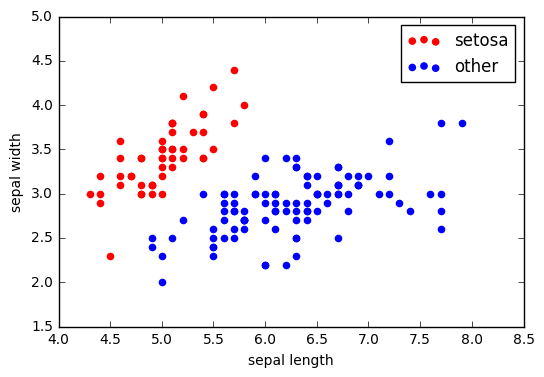

In [175]:
# if you do not have the csv data file call fetch_iris_data() by removing the comment in the line below
# fetch_iris_data()

X_all, Y_all = load_iris_data()

plot_data(X_all, Y_all)

To a good approximation linearly separable. Therefore, without further preparation of the data we can proceed with implementing the perceptron.

## The perceptron code

We will implement the perceptron as a Python class.

In [176]:
class Perceptron: 
    def __init__(self, num):
        '''
        initialize class for `num` input signals
        '''

        # weights of the perceptron, initialized to zero
        # note the '1 + ' as the first weight entry is the threshold
        self.w_ = np.zeros(1 + num)

        return
    
    def activation_input(self, X):
        '''
        calculate the activation input of the neuron
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def classify(self, X):
        '''
        classify the data by sending the activation input through a step function
        '''
        return np.where(self.activation_input(X) >= 0.0, 1, -1)

    def learn(self, X_train, Y_train, eta=0.01, epochs=10):
        '''
        fit training features X_train with labels Y_train according to learning rate
        `eta` and total number of epochs `epochs` and log the misclassifications in errors_
        '''

        # reset internal list of misclassifications for the logging
        self.train_errors_ = [] 

        # repeat `epochs` many times
        for _ in range(epochs):
            err = 0
            # for each pair of features and corresponding label
            for x, y in zip(X_train, Y_train):
                # compute the update for the weight coefficients
                update = eta * ( y - self.classify(x) )
                # update the weights
                self.w_[1:] += update * x
                # update the threshold
                self.w_[0] += update
                # increment the number of misclassifications if update is not zero
                err += int(update != 0.0)
            # append the number of misclassifications to the internal list
            self.train_errors_.append(err)
    
        return

    def efficiency(self, X_test, Y_test): 
        '''
        compute the efficiency = 1 - number of misclassifications / number of data points
        '''

        err = 0
        
        # classify the test data
        Z = self.classify(X_test)
        for z, y in zip(Z, Y_test):
            err += int(z != y)

        return 1 - float(err) / len(X_test)

Plotting functions for the errors and decission regions

In [177]:
def plot_train_errors(self):
    '''
    plot the number of misclassifications per epoch
    '''

    # create two list, one with epoch numbers, and one with the errors per epoch
    epochs, num_errs = np.arange(len(self.train_errors_)), np.array(self.train_errors_)

    # plot the above data
    fig = plt.figure()
    axs = plt.gca()
    axs.set_xlabel('epoch')
    axs.set_ylabel('errors')
    axs.set_title('Errors during training')
    plt.plot(epochs, num_errs)

    return

def plot_decision_regions(self, X, Y, X_train, Y_train, resolution):

    # set up a 2d mesh of data points with resolution `resolution`
    x1_min, x1_max = X[:, 0].min() - 2, X[:, 0].max() + 2
    x2_min, x2_max = X[:, 1].min() - 2, X[:, 1].max() + 2

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # start new plot
    fig = plt.figure()
    axs = plt.gca()

    # make fictitious feature data out of the above 2d mesh
    x_mesh = np.array( [xx1.ravel(), xx2.ravel()] ).T
    # let the perceptron classify these features
    Z = self.classify(x_mesh)
    Z = Z.reshape(xx1.shape)

    # plot the mesh as contour plot
    axs.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    axs.set_xlim(xx1.min(), xx1.max())
    axs.set_ylim(xx2.min(), xx2.max())
    
    # sort the input data according to the flower species
    X_setosa = []
    X_other = []
    for x, y in zip(X, Y):
        if y == -1:
            X_setosa.append(x)
        else:
            X_other.append(x)

    # turn the array into numpy arrays
    X_setosa = np.array(X_setosa)
    X_other = np.array(X_other)

    # and make a scatter plot with different styles for the two different species
    axs.scatter(X_setosa[:, 0], X_setosa[:, 1], 
                color='red', marker='.', label='Setosa')
    axs.scatter(X_other[:, 0], X_other[:, 1], 
                color='blue', marker='.', label='Other')
    
    # sort the training data according to the flower species
    X_setosa = []
    X_other = []
    for x, y in zip(X_train, Y_train):
        if y == -1:
            X_setosa.append(x)
        else:
            X_other.append(x)

    # turn the array into numpy arrays
    X_setosa = np.array(X_setosa)
    X_other = np.array(X_other)
    
    # and make a scatter plot with different styles for the two different species
    axs.scatter(X_setosa[:, 0], X_setosa[:, 1], 
                color='red', marker='x', label='S. training')
    axs.scatter(X_other[:, 0], X_other[:, 1], 
                color='blue', marker='x', label='O. training')

    # add some additional annotations of the plot
    axs.set_xlabel('sepal length')
    axs.set_ylabel('sepal width')
    axs.legend(loc='upper right')
    axs.set_title('Perceptron')

    return

###  Carrying out the training

The data is split into two parts:

* One data set of samples for training 
* and the other one for testing the classification efficiency of the perceptron.

In [178]:
train_samples = int( len(X_all) / 3 )

# training data
X_train, Y_train = X_all[:train_samples], Y_all[:train_samples]

# data for testing the efficiency
X, Y = X_all[train_samples:], Y_all[train_samples:]

Next, we initialize the perceptron:

In [179]:
ppn = Perceptron(X.shape[1])

start the trainning and plot the number of misclassification per epoch:

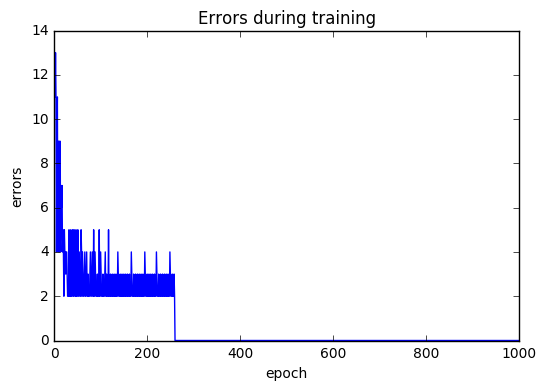

In [180]:
ppn.learn(X_train, Y_train, eta=0.1, epochs=1000)
plot_train_errors(ppn)

**Note:** These are just the number of misclassification per epoch of the training data. The plot does not show the absolute number of misclassification.

Next, let us plot the decission regions of the perceptron:

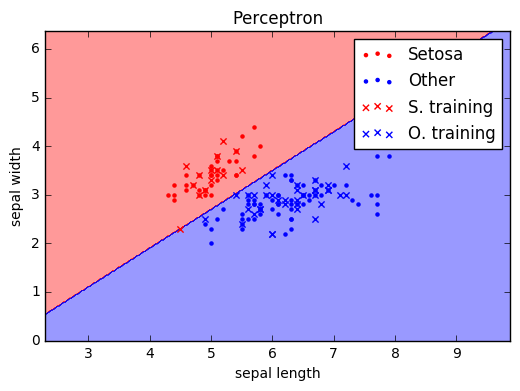

In [181]:
plot_decision_regions(ppn, X, Y, X_train, Y_train, 0.02)

And finally, we compute the overall efficiency:

In [182]:
eff_train = ppn.efficiency(X_train, Y_train)
eff_test = ppn.efficiency(X, Y)
eff_all = ppn.efficiency(X_all, Y_all)

print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)
print('Efficiency (all)   =', eff_all)

Efficiency (train) = 1.0
Efficiency (test)  = 1.0
Efficiency (all)   = 1.0


## Adaptive linear nuron code

We shall use the same data. Therefore, we need only a new implementation of the classicfier class.

In [183]:
class Adaline(Perceptron):

    def learn(self, X_train, Y_train, eta=0.01, epochs=1000):
        '''
        fit training data according to eta and n_iter
        and log the errors in errors_
        '''

        # we initialize two list, each for the misclassifications and the cost function
        self.train_errors_ = []
        self.train_loss_ = []

        # for all the epoch
        for _ in range(epochs):
            # classify the traning features
            Z = self.classify(X_train)
            # count the misqualifications for the logging
            err = 0
            for z, y in zip(Z, Y_train):
                err += int(z != y)
            # ans save them in the list for later use
            self.train_errors_.append(err)
            
            # compute the activation input of the entire traning features
            output = self.activation_input(X_train)
            # and then the deviation from the labels
            delta = Y_train - output
            # the following is an implmentation of the adaline update rule
            self.w_[1:] += eta * X_train.T.dot(delta)
            self.w_[0] += eta * delta.sum()
            # and finally, we record the loss function
            loss = (delta ** 2).sum() / 2.0
            # and save it for later use
            self.train_loss_.append(loss)

        return

Another plotting function for the loss.

In [184]:
def plot_train_loss(self):
    '''
    plots the loss function value per epoch
    '''

    # create two lists, one enumerating the epochs, the other the cost values
    epochs, num_errs = np.arange(len(self.train_loss_)), np.array(self.train_loss_)

    # plot the loss per epoch
    fig = plt.figure()
    axs = plt.gca()
    axs.set_xlabel('epoch')
    axs.set_ylabel('cost')
    axs.set_title('Loss during training')
    plt.plot(epochs, num_errs)

    return

Like before, we first initialize the adaline class:

In [185]:
ada = Adaline(X.shape[1])

and the conduct the training, and plot the loss and misclassifications per epoch:

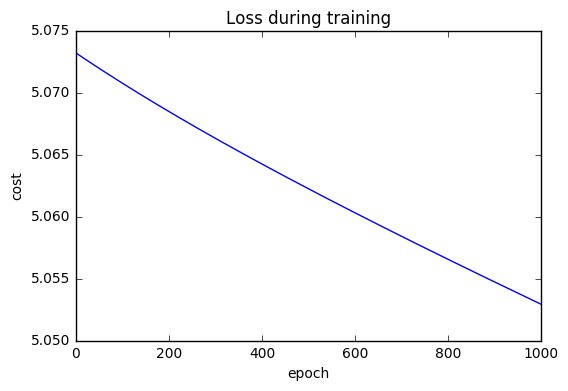

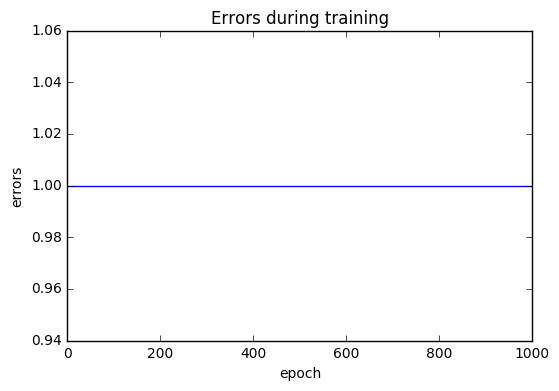

In [198]:
ada.learn(X_train, Y_train, eta=0.0001, epochs=1000)
plot_train_loss(ada)
plot_train_errors(ada)

And furthermore, the decission regions:

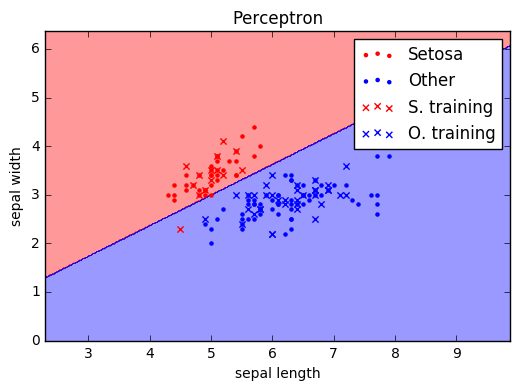

In [187]:
plot_decision_regions(ada, X, Y, X_train, Y_train, 0.02)

And finally, the we compute the efficiency:

In [188]:
eff_train = ppn.efficiency(X_train, Y_train)
eff_test = ppn.efficiency(X, Y)
eff_all = ppn.efficiency(X_all, Y_all)

print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)
print('Efficiency (all)   =', eff_all)

Efficiency (train) = 1.0
Efficiency (test)  = 1.0
Efficiency (all)   = 1.0


# Support Vector Machine

As discussed in class, the Adaline concept can be generalized to loss functions, which encode
* how accurately (and in which sense) the training data has to be matched
* and in which sense the resulting classifier should be able to generalize to unknown data.

In the following we implement the loss function for the so-called support vector machine:

In [189]:
-

The inner loop of the learning and update rule for the SVM is exactly the same as the one implemented for the Adaline -- only the loss function changes:

In [190]:
class SVM(Adaline):

    def learn(self, X_train, Y_train, l=1.0, eta=0.01, epochs=1000):
        '''
        fit training data according to eta and n_iter
        and log the errors in errors_
        '''

        # we initialize two list, each for the misclassifications and the cost function
        self.train_errors_ = []
        self.train_loss_ = []

        # for all the epoch
        for _ in range(epochs):
            # classify the traning features
            Z = self.classify(X_train)
            # count the misqualifications for the logging
            err = 0
            for z, y in zip(Z, Y_train):
                err += int(z != y)
            # ans save them in the list for later use
            self.train_errors_.append(err)

            loss = LossSVM(l, X_train, Y_train)
            # compute loss for this epoch
            self.train_loss_.append( loss.val(self.w_) )  
            # compute gradient of loss function and with it the update for w
            delta_w = - eta * loss.diff(self.w_)
            # update the weights
            self.w_ += delta_w

        return 

Initialize the SVM:

In [191]:
svm = SVM(X.shape[1])

and let us see how well it performs:

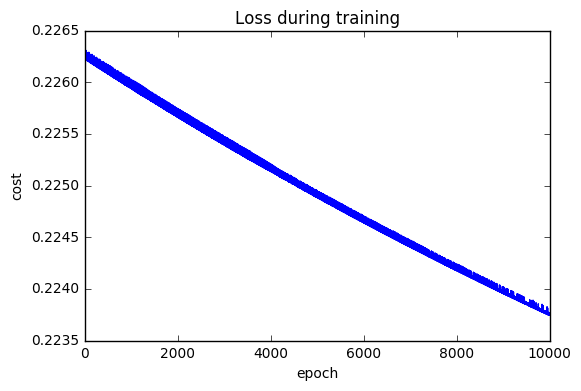

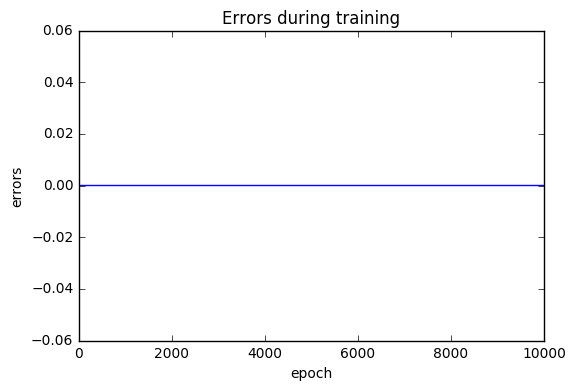

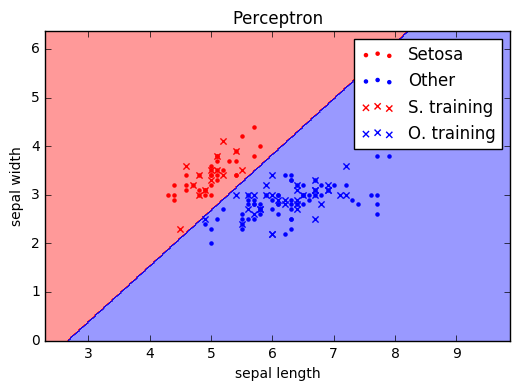

In [195]:
svm.learn(X_train, Y_train, l=0.05, eta=0.01, epochs=10000) 
plot_train_loss(svm)
plot_train_errors(svm) 
plot_decision_regions(svm, X, Y, X_train, Y_train, 0.02)

In [16]:
w = np.zeros((5, 2))
x = np.array([1, 2])
print(x.argmax())
np.dot(w, x)

1


array([ 0.,  0.,  0.,  0.,  0.])

In [52]:
x = np.array( [ [1,2], [3,4], [5,6], [7,8], [9,10], [11,12] ] )
w = np.array( [[1,2],[3,4],[5,6]] )
b = np.array( [1, 2, 3] )


print(np.array([x.sum(axis=0)]))


[[36 42]]


In [43]:
y = np.array([1, 2, 0])

def label2vec(y):
    vecs = []
    for l in y:
        vec = [1, 0, 0]
        if l == 1:
            vec = [0, 1, 0]
        if l == 2:
            vec = [0, 0, 1]
        vecs.append(vec)
        
    return np.array(vecs)

label2vec(y)

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])